### Study of Eurostoxx Spot Dividend Dynamics

##### Starting from time series regarding the Eurostoxx spot Index and Eurostoxx Dividend Futures index, the goal of this study is to highlight the presence of a dividend slope and propose a modelling of this slope. We will also discuss what are the impacts of this slope from a risk management perspective.

##### Import the pandas package and load the SX5E spot and Div futures STOXX50E.csv / div_futures_sx5e.csv as dataframes

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
spot_csv=r"C:\Users\jeand\Google Drive\Skema - Python applied to Finance\2020\Python 1\STOXX50E.csv"
div_csv=r"C:\Users\jeand\Google Drive\Skema - Python applied to Finance\2020\Python 1\div_futures_sx5e.csv"

df_spot=pd.read_csv(spot_csv)
df_div_futures=pd.read_csv(div_csv)

df_div_futures.head(5)

,future_maturity_date,observation_date,time_to_maturity,price
0,2014-12-31 12:00:00,2014-12-19 12:00:00,0.032877,114.07
1,2014-12-31 12:00:00,2014-12-18 12:00:00,0.035616,114.10
2,2014-12-31 12:00:00,2014-12-17 12:00:00,0.038356,114.10
3,2014-12-31 12:00:00,2014-12-16 12:00:00,0.041096,114.10
4,2014-12-31 12:00:00,2014-12-15 12:00:00,0.043836,114.10


##### Create a list common_dates with the observation dates common to both files

In [3]:
list_dates_spot=list(df_spot["Date"])
list_dates_spot # Get the list of dates for SX5E spot

df_div_futures["observation_date"]=[x[0:10] for x in list(df_div_futures["observation_date"])] # convert the date to a YYYY-MM-DD format
list_dates_futures=list(df_div_futures["observation_date"]) # Get the list of dates for SX5E DIV

common_dates=[x for x in list_dates_spot if x in list_dates_futures] # Find the common dates

##### Build a Dataframe df_sliding_ts which contains the historical time series of spot and sliding divident futures from year 1 to year 5. To convert converging prices to sliding, you can use the np.interp function.

In [4]:
df_sliding_ts=pd.DataFrame(columns=["spot", "div_1Y", "div_2Y", "div_3Y", "div_4Y", "div_5Y"])
for date in common_dates:
    temp_list=[]
    spot=float(df_spot[df_spot["Date"]==date]["Close"])
    temp_list.append(spot)
    df_div=df_div_futures[df_div_futures["observation_date"]==date]
    for i in range(1,6):
        div=np.interp(i, df_div["time_to_maturity"], df_div["price"])
        temp_list.append(div)
    df_sliding_ts.loc[date] = temp_list
df_sliding_ts=df_sliding_ts.dropna()  
df_sliding_ts.head(5)

,spot,div_1Y,div_2Y,div_3Y,div_4Y,div_5Y
2013-09-09,2798.310059,107.6,105.045479,102.109836,99.718356,97.487123
2013-09-10,2851.399902,107.9,105.404658,102.640984,100.450137,98.281096
2013-09-11,2863.439941,108.1,105.455616,102.565027,100.205753,97.905753
2013-09-12,2862.070068,108.0,105.484932,102.797541,100.360274,98.069041
2013-09-13,2867.110107,108.1,105.575068,102.821311,100.283562,98.032877


##### Using Numpy, build a dataframe df_sliding_log_returns with the log returns of the dataframe df_sliding_ts

In [5]:
df_sliding_log_returns=pd.DataFrame(columns=list(df_sliding_ts.columns))
for column in list(df_sliding_ts.columns):
    df_sliding_log_returns[column]=np.log(df_sliding_ts[column]) - np.log(df_sliding_ts[column].shift(1))
df_sliding_log_returns=df_sliding_log_returns.dropna()
df_sliding_log_returns.head(5)

,spot,div_1Y,div_2Y,div_3Y,div_4Y,div_5Y
2013-09-10,0.018794,0.002784,0.003413,0.005188,0.007312,0.008111
2013-09-11,0.004214,0.001852,0.000483,-0.000740,-0.002436,-0.003826
2013-09-12,-0.000479,-0.000925,0.000278,0.002264,0.001541,0.001666
2013-09-13,0.001759,0.000925,0.000854,0.000231,-0.000765,-0.000369
2013-09-16,0.009556,0.000925,0.001338,0.001065,-0.001331,-0.000774


##### Using stats.linregress, compute the slope and R value of the linear regression between the spot returns and the 1Y dividends

In [6]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df_sliding_log_returns["spot"], df_sliding_log_returns["div_1Y"])
print("The slope is "+str(slope))
print("The R Value is "+str(r_value))

The slope is 0.11929134263974218
The R Value is 0.17956268315989687


Text(0.5, 1.0, '1Y Dividend Future Returns = f(Spot returns)')

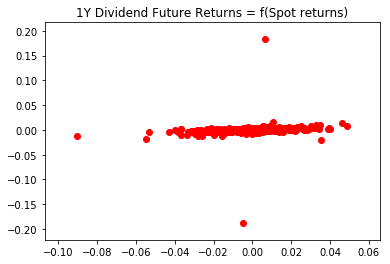

In [7]:
plt.scatter(df_sliding_log_returns["spot"], df_sliding_log_returns["div_1Y"], c = 'red')
plt.title("1Y Dividend Future Returns = f(Spot returns)")

##### Repeat the same process between the spot and the 5Y maturity futures

In [8]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df_sliding_log_returns["spot"], df_sliding_log_returns["div_5Y"])
print("The slope is "+str(slope))
print("The R Value is "+str(r_value))


The slope is 0.7997387751989525
The R Value is 0.8237152389067246


Text(0.5, 1.0, '5Y Dividend Future Returns = f(Spot returns)')

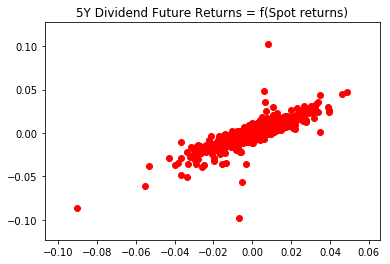

In [9]:
plt.scatter(df_sliding_log_returns["spot"], df_sliding_log_returns["div_5Y"], c = 'red')
plt.title("5Y Dividend Future Returns = f(Spot returns)")

##### Plot the shape of the slope between spot and dividend returns for each maturity between 1Y and 5Y

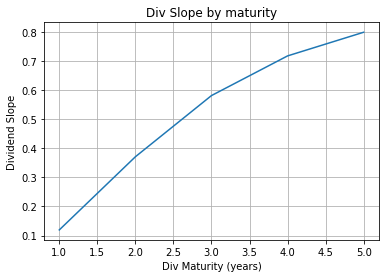

In [10]:
list_maturity=[1, 2, 3, 4, 5]
list_slopes=[]
for maturity in list_maturity:
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_sliding_log_returns["spot"], df_sliding_log_returns["div_"+str(maturity)+"Y"])
    list_slopes.append(slope)
                                                                   
fig, ax = plt.subplots()
ax.plot(list_maturity, list_slopes)  
ax.set(xlabel='Div Maturity (years)', ylabel='Dividend Slope',
       title='Div Slope by maturity')
ax.grid()


##### Based on those observations, what can you conclude regarding the spot / div dynamics ?
##### What is the impact in terms of risk management ?
##### Could you propose a model for dividends which takes into account dividend slope ?
##### Is Dividend Slope and observable market data ?
##### What is the impact from a control perspective  ?